In [61]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
import math
# Plotly Libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importing Data

In [130]:
food_bank_2018 = pd.read_csv(r'C:\Users\Jairo\Desktop\Stanford_Data\2021_Stanford_Datathon\Clean_States_food_bank_data\States_Food_Bank_Data_2020_2018')
food_bank_2017 = pd.read_csv(r'C:\Users\Jairo\Desktop\Stanford_Data\2021_Stanford_Datathon\Clean_States_food_bank_data\States_Food_Bank_Data_2019_2017')
food_bank_2016 = pd.read_csv(r'C:\Users\Jairo\Desktop\Stanford_Data\2021_Stanford_Datathon\Clean_States_food_bank_data\States_Food_Bank_Data_2018_2016')
food_bank_2015 = pd.read_csv(r'C:\Users\Jairo\Desktop\Stanford_Data\2021_Stanford_Datathon\Clean_States_food_bank_data\States_Food_Bank_Data_2017_2015')
food_bank_2014 = pd.read_csv(r'C:\Users\Jairo\Desktop\Stanford_Data\2021_Stanford_Datathon\Clean_States_food_bank_data\States_Food_Bank_Data_2016_2014')


In [131]:
food_bank_2014.head()

,Unnamed: 0,FIPS,State Name,State,2014 Food Insecurity Rate %,# of Food Insecure Persons in 2014,% Low Threshold in state,Low Threshold Type,% High Threshold in state,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,2014 Child Food Insecurity Rate %,# of Food Insecure Children in 2014,% food insecure Children in HH w/HH Incomes Below 185 FPL in 2014,% food insecure Children in HH w/HH Incomes Above 185 FPL in 2014,2014 Cost Per Meal,2014 Weighted Annual Food Budget Shortfall
0,0,1,Alabama,AL,18.8,911440.0,130.0,SNAP,185.0,Other Nutrition Program,53.3,16.3,30.4,26.4,292330.0,73.0,27.0,2.90,4.663670e+08
1,1,2,Alaska,AK,14.4,105770.0,130.0,SNAP,185.0,Other Nutrition Program,44.5,15.1,40.4,20.4,38080.0,58.0,42.0,3.33,6.218100e+07
2,2,4,Arizona,AZ,17.1,1150650.0,185.0,"SNAP, Other Nutrition Programs",185.0,"SNAP, Other Nutrition Programs",67.0,NaN,33.0,26.8,434840.0,68.0,32.0,2.78,5.637670e+08
3,3,5,Arkansas,AR,19.1,567250.0,130.0,SNAP,185.0,Other Nutrition Program,53.4,16.5,30.2,26.3,185660.0,72.0,28.0,2.72,2.726680e+08
4,4,6,California,CA,13.9,5401770.0,200.0,"SNAP, Other Nutrition Programs",200.0,"SNAP, Other Nutrition Programs",78.6,NaN,21.4,22.9,2099120.0,68.0,32.0,3.04,2.896128e+09


# ShortFall Graph for the Past 5 years

In [132]:
df_states_shortfall_2014 = food_bank_2014[['State Name', '2014 Weighted Annual Food Budget Shortfall']]
df_states_shortfall_2015 = food_bank_2015['2015 Weighted Annual Food Budget Shortfall']
df_states_shortfall_2016 = food_bank_2016['2016 Weighted Annual Food Budget Shortfall']
df_states_shortfall_2017 = food_bank_2017['2017 Weighted Annual Food Budget Shortfall']
df_states_shortfall_2018 = food_bank_2018['2018 Weighted Annual Food Budget Shortfall']


In [133]:
df_states_shortfall = pd.concat([df_states_shortfall_2014,
                                 df_states_shortfall_2015,
                                df_states_shortfall_2016,
                                df_states_shortfall_2017,
                                df_states_shortfall_2018], axis = 1)

In [134]:
df_states_shortfall.head()

,State Name,2014 Weighted Annual Food Budget Shortfall,2015 Weighted Annual Food Budget Shortfall,2016 Weighted Annual Food Budget Shortfall,2017 Weighted Annual Food Budget Shortfall,2018 Weighted Annual Food Budget Shortfall
0,Alabama,4.663670e+08,4.506700e+08,4.066390e+08,4.041800e+08,4.237450e+08
1,Alaska,6.218100e+07,6.274300e+07,5.852500e+07,5.772100e+07,5.793000e+07
2,Arizona,5.637670e+08,5.430840e+08,5.062750e+08,4.823580e+08,4.652590e+08
3,Arkansas,2.726680e+08,2.677570e+08,2.467760e+08,2.469390e+08,2.443640e+08
4,California,2.896128e+09,2.750484e+09,2.473458e+09,2.381146e+09,2.385968e+09


In [135]:
US_shortfall = []
US_shortfall.append(df_states_shortfall['2014 Weighted Annual Food Budget Shortfall'].sum(axis=0))
US_shortfall.append(df_states_shortfall['2015 Weighted Annual Food Budget Shortfall'].sum(axis=0))
US_shortfall.append(df_states_shortfall['2016 Weighted Annual Food Budget Shortfall'].sum(axis=0))
US_shortfall.append(df_states_shortfall['2017 Weighted Annual Food Budget Shortfall'].sum(axis=0))
US_shortfall.append(df_states_shortfall['2018 Weighted Annual Food Budget Shortfall'].sum(axis=0))

US_ShortFall = pd.DataFrame(data={'Shortfall Amount in Dollars': US_shortfall,
                                 'Year':['2014','2015','2016','2017','2018']
                                 })

US_ShortFall

,Shortfall Amount in Dollars,Year
0,2.386714e+10,2014
1,2.317681e+10,2015
2,2.142669e+10,2016
3,2.086625e+10,2017
4,2.045611e+10,2018


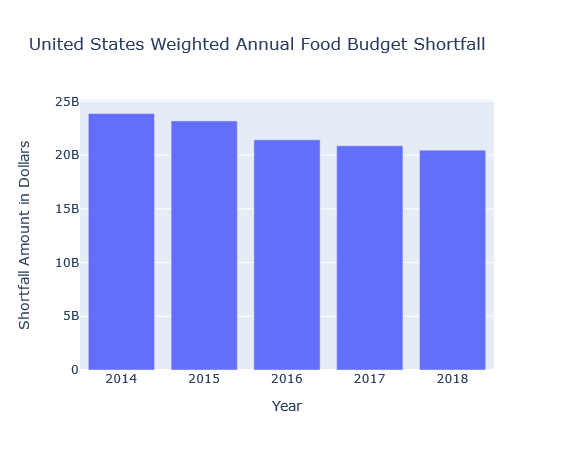

In [136]:
fig = px.bar(US_ShortFall,x='Year',y='Shortfall Amount in Dollars',title="United States Weighted Annual Food Budget Shortfall")
fig.show()

Despite the shortfall amount yearly seems to decreacre thi spast 5 years.This is still billions of dollars that Food Banks needed to have meals for people in the United States. To put into purpective, that's X amount of adults not having a meal every day and Y aount of children not geetting a meal.


# Meals For the Past 5 years not distributed due to Shortfall 

In [137]:
avg_meal = []
avg_meal.append(food_bank_2014['2014 Cost Per Meal'].sum(axis=0) / 50)
avg_meal.append(food_bank_2015['2015 Cost Per Meal'].sum(axis=0) / 50)
avg_meal.append(food_bank_2016['2016 Cost Per Meal'].sum(axis=0) / 50)
avg_meal.append(food_bank_2017['2017 Cost Per Meal'].sum(axis=0) / 50)
avg_meal.append(food_bank_2018['2018 Cost Per Meal'].sum(axis=0) / 50)

US_avg_meal_price = pd.DataFrame(data={'Avg. Meal Price': avg_meal,
                                 'Year':['2014','2015','2016','2017','2018']
                                 })

US_avg_meal_price.loc[1][0]

2.9988000000000006

In [138]:
meals_per_year_missing = US_ShortFall['Shortfall Amount in Dollars'].sum(axis=0)/(US_avg_meal_price['Avg. Meal Price'].sum(axis=0) / 5)

In [139]:
meals_per_year_missing.sum(axis=0)

36026052959.70599

That is 360_944_575_541 Meals For the Past 5 years not distributed due to Shortfall.

# Total Amount of Children with food insecurity

In [140]:
children = []
children.append(food_bank_2014['# of Food Insecure Children in 2014'].sum(axis=0))
children.append(food_bank_2015['# of Food Insecure Children in 2015'].sum(axis=0) )
children.append(food_bank_2016['# of Food Insecure Children in 2016'].sum(axis=0))
children.append(food_bank_2017['# of Food Insecure Children in 2017'].sum(axis=0) )
children.append(food_bank_2018['# of Food Insecure Children in 2018'].sum(axis=0))

children_food_insecure = pd.DataFrame(data={'USA Total Amount of Food Insecure Children': children,
                                 'Year':['2014','2015','2016','2017','2018']
                                 })

children_food_insecure

,USA Total Amount of Food Insecure Children,Year
0,16192020.0,2014
1,14784730.0,2015
2,13780920.0,2016
3,13411620.0,2017
4,12377330.0,2018


### (Meals Per Year Not Distributed Due to SHortfall in the past 5 years) / (USA Total Amount of Foof Insecure Children in th ePast 5 years) = Meals Not Given Per Children

In [141]:
meals_per_year_missing.sum(axis=0)/ children_food_insecure['USA Total Amount of Food Insecure Children'].sum(axis=0)

510.67014918228534

In [149]:
children_food_insecure['USA Total Amount of Food Insecure Children'].sum(axis=0)

70546620.0

# Adults with Food Insecurity

In [142]:
adults = []
adults.append(food_bank_2014['# of Food Insecure Persons in 2014 '].sum(axis=0) )
adults.append(food_bank_2015['# of Food Insecure Persons in 2015 '].sum(axis=0) )
adults.append(food_bank_2016['# of Food Insecure Persons in 2016 '].sum(axis=0))
adults.append(food_bank_2017['# of Food Insecure Persons in 2017'].sum(axis=0) )
adults.append(food_bank_2018['# of Food Insecure Persons in 2018'].sum(axis=0))

adults_food_insecure = pd.DataFrame(data={'USA Total Amount of Food Insecure Adults': adults,
                                 'Year':['2014','2015','2016','2017','2018']
                                 })

adults_food_insecure

,USA Total Amount of Food Insecure Adults,Year
0,47539790.0,2014
1,44584020.0,2015
2,42467360.0,2016
3,41133950.0,2017
4,39922630.0,2018


In [143]:
meals_per_year_missing.sum(axis=0)/ adults_food_insecure['USA Total Amount of Food Insecure Adults'].sum(axis=0)

167.05972104835777

# Amount of Meals not given to both adults and children

In [144]:
meals_per_year_missing.sum(axis=0)/ (adults_food_insecure['USA Total Amount of Food Insecure Adults'].sum(axis=0) +
                                     children_food_insecure['USA Total Amount of Food Insecure Children'].sum(axis=0))

125.87967037823279

# Percentage of Adult Food Insecurity per state per year

In [145]:
df_states_food_insecurity_2014 = food_bank_2014[['State Name', '2014 Food Insecurity Rate %']]
df_states_food_insecurity_2015 = food_bank_2015['2015 Food Insecurity Rate %']
df_states_food_insecurity_2016 = food_bank_2016['2016 Food Insecurity Rate %']
df_states_food_insecurity_2017 = food_bank_2017['2017 Food Insecurity Rate %']
df_states_food_insecurity_2018 = food_bank_2018['2018 Food Insecurity Rate %']

df_states_adult_food_insecurity = pd.concat([df_states_food_insecurity_2014,
                                 df_states_food_insecurity_2015,
                                df_states_food_insecurity_2016,
                                df_states_food_insecurity_2017,
                                df_states_food_insecurity_2018], axis = 1)
df_states_adult_food_insecurity.head()

,State Name,2014 Food Insecurity Rate %,2015 Food Insecurity Rate %,2016 Food Insecurity Rate %,2017 Food Insecurity Rate %,2018 Food Insecurity Rate %
0,Alabama,18.8,17.7,16.5,16.3,17.0
1,Alaska,14.4,13.9,13.4,13.6,12.9
2,Arizona,17.1,15.8,14.9,14.0,13.1
3,Arkansas,19.1,18.4,17.2,17.3,17.3
4,California,13.9,12.5,11.7,11.0,10.8


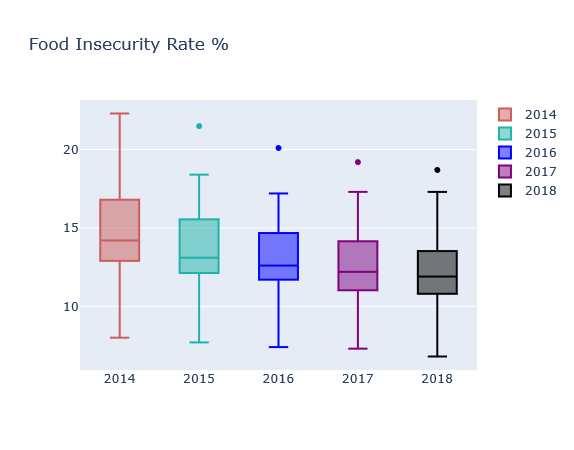

In [146]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_states_adult_food_insecurity['2014 Food Insecurity Rate %'], name='2014',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=df_states_adult_food_insecurity['2015 Food Insecurity Rate %'], name = '2015',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df_states_adult_food_insecurity['2016 Food Insecurity Rate %'], name='2016',
                marker_color = 'blue'))
fig.add_trace(go.Box(y=df_states_adult_food_insecurity['2017 Food Insecurity Rate %'], name = '2017',
                marker_color = 'purple'))
fig.add_trace(go.Box(y=df_states_adult_food_insecurity['2018 Food Insecurity Rate %'], name='2018',
                marker_color = 'black'))

fig.update_layout(title_text="Food Insecurity Rate %")
fig.show()

# Percentage of Children in Food Insecurity in all states each year

In [147]:
df_states_food_insecurity_2014 = food_bank_2014[['State Name', '2014 Child Food Insecurity Rate %']]
df_states_food_insecurity_2015 = food_bank_2015['2015 Child Food Insecurity Rate %']
df_states_food_insecurity_2016 = food_bank_2016['2016 Child Food Insecurity Rate %']
df_states_food_insecurity_2017 = food_bank_2017['2017 Child Food Insecurity Rate %']
df_states_food_insecurity_2018 = food_bank_2018['2018 Child Food Insecurity Rate %']

df_states_children_food_insecurity = pd.concat([df_states_food_insecurity_2014,
                                 df_states_food_insecurity_2015,
                                df_states_food_insecurity_2016,
                                df_states_food_insecurity_2017,
                                df_states_food_insecurity_2018], axis = 1)
df_states_children_food_insecurity.head()

,State Name,2014 Child Food Insecurity Rate %,2015 Child Food Insecurity Rate %,2016 Child Food Insecurity Rate %,2017 Child Food Insecurity Rate %,2018 Child Food Insecurity Rate %
0,Alabama,26.4,24.1,22.5,22.3,23.1
1,Alaska,20.4,19.6,18.6,18.7,18.1
2,Arizona,26.8,24.0,22.7,21.3,19.0
3,Arkansas,26.3,25.0,23.2,23.6,23.1
4,California,22.9,20.7,19.0,18.1,15.2


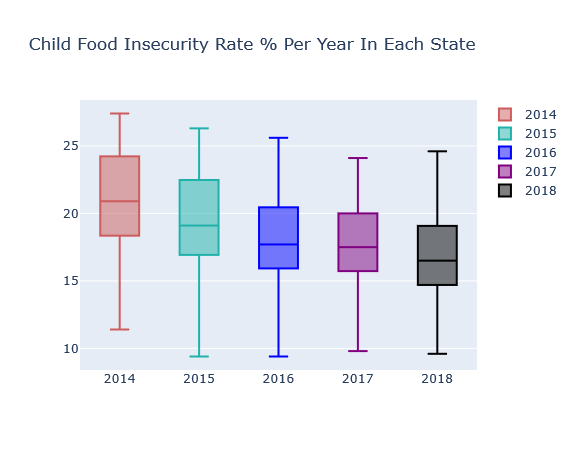

In [148]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_states_children_food_insecurity['2014 Child Food Insecurity Rate %'], name='2014',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=df_states_children_food_insecurity['2015 Child Food Insecurity Rate %'], name = '2015',
                marker_color = 'lightseagreen'))
fig.add_trace(go.Box(y=df_states_children_food_insecurity['2016 Child Food Insecurity Rate %'], name='2016',
                marker_color = 'blue'))
fig.add_trace(go.Box(y=df_states_children_food_insecurity['2017 Child Food Insecurity Rate %'], name = '2017',
                marker_color = 'purple'))
fig.add_trace(go.Box(y=df_states_children_food_insecurity['2018 Child Food Insecurity Rate %'], name='2018',
                marker_color = 'black'))

fig.update_layout(title_text="Child Food Insecurity Rate % Per Year In Each State")
fig.show()